
cross validation 
<br> deviding dataset into unique intervals
<br>then use these sets differently as train,test in several times
<br> for example in 6 splits: 
            <br>  1-test set , remaining 5 - train set
            <br> 2-tets set , remaining 5 - train set 
                                             likewise

In [26]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score
)
warnings.filterwarnings("ignore")

In [2]:
X_train = np.load("artifacts/X_train.npz")['arr_0']
X_test = np.load("artifacts/X_test.npz")['arr_0']
y_train = np.load("artifacts/y_train.npz")['arr_0']
y_test = np.load("artifacts/y_test.npz")['arr_0']

### Configure k-fold CV

In [18]:
cv = StratifiedKFold(
    n_splits=6,
    shuffle=True, 
    random_state=42)


In [19]:
model_lr = LogisticRegression(
    random_state=42,
    max_iter=1000,
) 

In [20]:
score_arr = ['accuracy', 'precision', 'recall', 'f1']
for score in score_arr:
    cv_results = cross_validate(
        model_lr,
        X_train,
        y_train,
        cv=cv,
        scoring=score,
        return_train_score=False
    )
    test_score = cv_results['test_score']
    test_score = np.mean(test_score)
    print(f"{score} score: {test_score:.4f}")
 


accuracy score: 0.7165
precision score: 0.7181
recall score: 0.7133
f1 score: 0.7156


In [21]:
cv_results = cross_validate(
        model_lr,
        X_train,
        y_train,
        cv=cv,
        scoring='f1',
        return_train_score=False
    )
cv_results

{'fit_time': array([0.0182972 , 0.02244377, 0.01484585, 0.01570654, 0.02008557,
        0.01777387]),
 'score_time': array([0.00200057, 0.00307846, 0.00587273, 0.        , 0.00190544,
        0.0035193 ]),
 'test_score': array([0.72853828, 0.71621622, 0.70943396, 0.69150943, 0.73438245,
        0.71347249])}

In [25]:
best_index = np.argmax(cv_results['test_score'])
fold_indices = list(cv.split(X_train, y_train))

best_train_indices, best_test_indices = fold_indices[best_index]
X_train_best = X_train[best_train_indices]
X_test_best = X_train[best_test_indices]
y_train_best = y_train[best_train_indices]
y_test_best = y_train[best_test_indices]

In here we are not training modal but use modal to understand the best split. after finding the best split (best index) we use that split to train the modal

In [27]:
model_lr = LogisticRegression(
    random_state = 42,
    max_iter=1000,

)
# Fit the model
model_lr.fit(X_train_best, y_train_best)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, Y_hat_test)
precision = precision_score(y_test, Y_hat_test)
recall = recall_score(y_test, Y_hat_test)
f1 = f1_score(y_test, Y_hat_test)

In [30]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7155
Precision: 0.37283236994219654
Recall: 0.6564885496183206
F1 Score: 0.47557603686635946


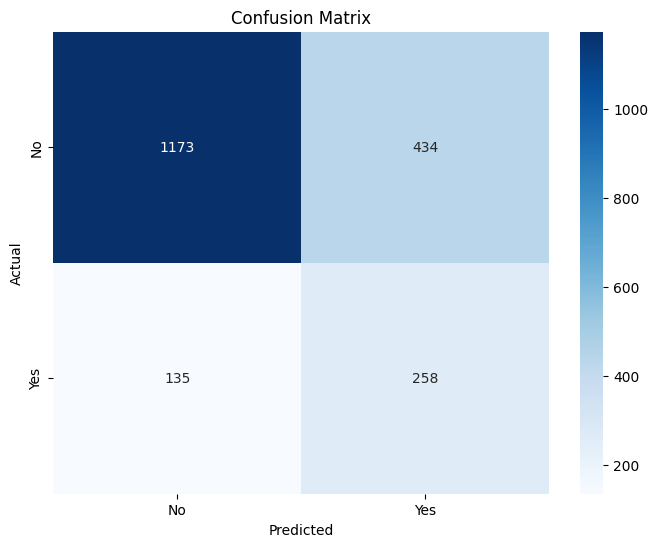

In [31]:
cm = confusion_matrix(y_test, Y_hat_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

model is no much improved because logistic regression is a very weak modal